In [1]:
from DriveCalc import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
prop_table = get_prop_database()

### now we have the complete database in pandas

In [3]:
for col in prop_table.columns:
            print(col)

myid
tbs
Name
Dia
Pitch
a
b
AltThr
TmpThr
srcThr
c
d
AltPwr
TmpPwr
srcPwr
n10N
n100W
Folder
Hub
MaxRPM
match
Rely
ts


In [4]:
selection = prop_table[prop_table['Dia'] == 13.0]
selection = selection[selection['Pitch'] < 5.0]

In [5]:
print(selection)

     myid  tbs       Name   Dia  Pitch         a         b  AltThr  TmpThr  \
126   128    4      APC E  13.0    4.0  17.26154  2.264648       0    15.0   
437   446    4  APC E Dat  13.0    4.0  21.61529  2.015050      20    22.0   
539   548    4     HiProp  13.0    4.4  26.42576  2.005561     100    17.0   

                                                srcThr  ...  TmpPwr  \
126                                       DC generated  ...    18.0   
437  APC data from http://www.apcprop.com/v/downloa...  ...    22.0   
539                                       DC generated  ...    17.0   

                                                srcPwr    n10N   n100W Folder  \
126                                       DC generated  6056.1  6201.8      0   
437  APC data from http://www.apcprop.com/v/downloa...  6770.3  5574.8      0   
539                                       DC generated  6180.5  5750.4      0   

     Hub  MaxRPM  match  Rely                   ts  
126  0.0   14615      0 

In [6]:
my_prop = prop_table[prop_table['myid'] == 128]

In [7]:
my_prop

,myid,tbs,Name,Dia,Pitch,a,b,AltThr,TmpThr,srcThr,...,TmpPwr,srcPwr,n10N,n100W,Folder,Hub,MaxRPM,match,Rely,ts
126,128,4,APC E,13.0,4.0,17.26154,2.264648,0,15.0,DC generated,...,18.0,DC generated,6056.1,6201.8,0,0.0,14615,0,3,2010-03-09 20:07:44


In [8]:
prop_table[(prop_table['n10N'] > 8000.0) & (prop_table['n10N'] < 8500.0)]

,myid,tbs,Name,Dia,Pitch,a,b,AltThr,TmpThr,srcThr,...,TmpPwr,srcPwr,n10N,n100W,Folder,Hub,MaxRPM,match,Rely,ts
54,56,4,GWS RS,9.0,7.0,11.832290,2.117133,200,20.0,Dr Kiwi,...,15.0,Schenk,8206.60,7075.90,0,0.0,6666,0,30,2010-03-08 16:01:59
55,57,4,GWS RS 3-Blade,9.0,7.0,13.824870,2.024323,200,20.0,Dr Kiwi,...,7.0,Persson 23.11.05,8369.30,6566.00,0,0.0,6666,0,30,2010-03-08 16:02:22
77,79,4,AeroCAM,10.0,8.0,9.579566,2.206408,0,15.0,DC generated,...,15.0,Aeronaut Diagram,8293.70,6601.40,1,42.0,16000,0,8,2010-03-09 19:52:30
88,90,4,Graupner CAM,11.0,4.0,13.767390,2.012500,120,18.0,Hyperion,...,18.0,Hyperion,8491.95,7685.65,1,42.0,0,0,7,2006-03-21 17:17:59
106,108,4,Graupner CAM,12.0,4.0,10.700950,2.169500,120,18.0,Hyperion,...,18.0,DC generated,8169.90,5703.60,1,42.0,0,0,1,2009-10-24 13:10:36
231,233,4,APC SF,9.0,6.0,10.021100,2.221310,200,20.0,Dr Kiwi,...,5.0,DC generated,8012.60,6539.60,0,0.0,7222,0,3,2010-03-08 16:00:16
305,311,4,Dymond E,10.0,6.0,12.905850,2.073536,0,15.0,DC generated,...,15.0,DC generated,8226.10,6659.60,0,0.0,0,0,3,2009-08-19 21:43:23
336,345,4,Graupner CAM,10.0,6.0,13.421750,2.032977,0,15.0,DC generated,...,15.0,,8415.50,7610.00,0,0.0,13500,0,1,2010-03-09 19:47:10
338,347,4,Graupner CAM,10.0,8.0,17.469150,1.947381,0,15.0,DC generated,...,15.0,,8071.70,6740.00,0,0.0,13500,0,1,2010-03-09 19:52:55
440,449,4,Master Airscrew 3BL,10.0,7.0,16.058900,1.942275,0,15.0,DC generated,...,15.0,DC generated,8475.60,6630.60,0,0.0,0,0,3,2013-10-30 18:08:24


In [9]:
prop = PropellerStatic.fromTable(prop_table, 128)

generic
APC E


In [10]:
prop.n100W

6201.8

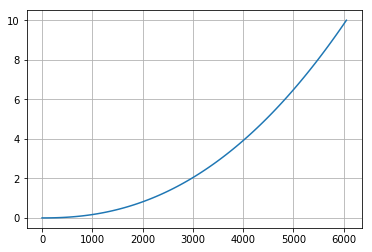

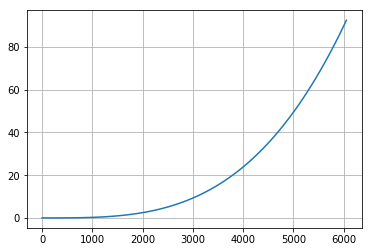

In [11]:
n = np.linspace(0,prop.n10N,100)
T = prop.Thrust(n)
plt.plot(n,T)
plt.grid()
plt.show()

P = prop.ShaftPower(n)
plt.plot(n,P)
plt.grid()
plt.show()

## create a new prop from data

### 13x4.5 Propeller Carbon Fiber 1345
### mit T-Motor MN3508-29

In [12]:
cf1345 = PropellerStatic()

generic


In [13]:
rpmData = np.array([4300, 5300, 6000, 6700, 7040])
tData = np.array([5.5, 8.1, 10.0, 13.0, 13.8])
iData = np.array([2.1, 3.7, 5.5, 7.1, 8.4])
pData = iData * 22.2 * 0.88

In [14]:
cf1345.fitThrust(rpmData,tData)

a=7.25008e-07  b=1.89271
n10N=5918.250343


In [15]:
cf1345.fitPower(rpmData,pData)

c=2.679e-09  d=2.80287
n100W=5913.746889


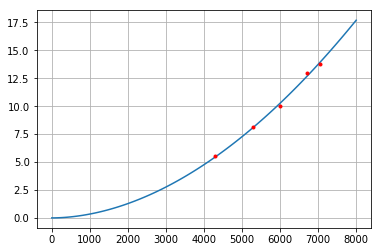

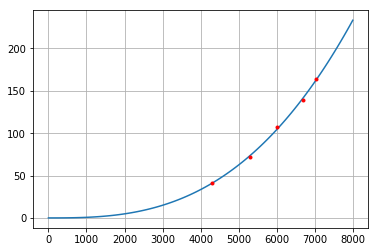

In [16]:
n = np.linspace(0,8000,100)
T = cf1345.Thrust(n)
plt.plot(n,T)
plt.plot(rpmData,tData,'r.')
plt.grid()
plt.show()

P = cf1345.ShaftPower(n)
plt.plot(n,P)
plt.plot(rpmData,pData,'r.')
plt.grid()
plt.show()